<a href="https://colab.research.google.com/github/ns4lin4s/data_science/blob/master/suggest_properties_tree_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos
import numpy as np
from sklearn import tree #Arbol de decision
from sklearn.model_selection import train_test_split #Nos permite generar los datos de entrenamiento y prueba
pd.options.mode.chained_assignment = None

**Cargar CSV**

In [174]:
df = pd.read_csv('propiedades_favoritas.csv')
df

,IdComuna,PrecioDesde,SuperficieUtilDesde,BanosDesde,DormitoriosDesde,IdRegion,Interes
0,3,2350.00,44.90,1,2,15,0
1,3,42500.00,0.00,0,0,15,0
2,8,2350.00,46.95,1,1,1,0
3,8,2550.00,45.00,1,1,1,0
4,8,2600.00,53.00,1,3,1,0
...,...,...,...,...,...,...,...
1003,340,4555.00,40.30,1,1,13,1
1004,342,0.15,2364.00,0,0,13,1
1005,342,12.00,0.00,0,0,13,1
1006,342,4900.00,58.94,2,2,13,1


**Visualizando la distribución de propiedades favoritas**

1    521
0    487
Name: Interes, dtype: int64


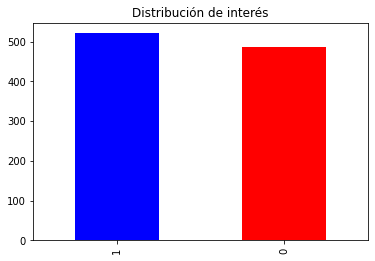

In [175]:
#Arreglo con la información de interés acerca de la propiedad
arr_interest = df['Interes'].value_counts()
print(arr_interest)
#Configuramos nuestro grafico de tipo barra y de color azul y rojo.
arr_interest.plot(kind = 'bar', color = ['b', 'r', 'g', 'y'])
plt.title('Distribución de interés')
#plt.xlabel(f'No: {str(arr_interest[0])} | Sí: {str(arr_interest[1])}')
plt.show()

**Pre-procesamiento**

In [176]:
features_cols = ["PrecioDesde","DormitoriosDesde", "SuperficieUtilDesde", "IdComuna", "IdRegion" , "BanosDesde"]

greater_than_price = (df['PrecioDesde'] > 1900)

df = df.where(greater_than_price).dropna()

less_than_area = (df['SuperficieUtilDesde'] < 500)

df = df.where(less_than_area).dropna()

train_predictor = df[features_cols]

train_predictor.loc[train_predictor['BanosDesde'] == 0, 'BanosDesde'] = 1

train_predictor.loc[train_predictor['DormitoriosDesde'] == 0, 'DormitoriosDesde'] = 1

train_predictor.loc[train_predictor['SuperficieUtilDesde'] < 20, 'SuperficieUtilDesde'] = train_predictor['SuperficieUtilDesde'].median()

print(train_predictor)


      PrecioDesde  DormitoriosDesde  ...  IdRegion  BanosDesde
0          2350.0               2.0  ...      15.0         1.0
1         42500.0               1.0  ...      15.0         1.0
2          2350.0               1.0  ...       1.0         1.0
3          2550.0               1.0  ...       1.0         1.0
4          2600.0               3.0  ...       1.0         1.0
...           ...               ...  ...       ...         ...
936        7220.0               2.0  ...      13.0         2.0
937        8757.0               2.0  ...      13.0         2.0
1003       4555.0               1.0  ...      13.0         1.0
1006       4900.0               2.0  ...      13.0         2.0
1007      22900.0               1.0  ...       1.0         1.0

[480 rows x 6 columns]


In [177]:
dummy = pd.get_dummies(train_predictor)
dummy.head()

,PrecioDesde,DormitoriosDesde,SuperficieUtilDesde,IdComuna,IdRegion,BanosDesde
0,2350.0,2.0,44.90,3.0,15.0,1.0
1,42500.0,1.0,57.68,3.0,15.0,1.0
2,2350.0,1.0,46.95,8.0,1.0,1.0
3,2550.0,1.0,45.00,8.0,1.0,1.0
4,2600.0,3.0,53.00,8.0,1.0,1.0


In [178]:
#Arreglo de valores del campo que necesitamos predecir
y_target = df['Interes'].values

#Usamos los datos falsos basado en los datos de entrenamiento
x_features_one = dummy.values

**Datos de entrenamiento y pruebas basados en la configuración indicada**

In [179]:
#divide la info en el 25% y un random state para que no sean siempre los mismos datos
x_train , x_test, y_train , y_test =  train_test_split(x_features_one, y_target, test_size= .25, random_state=1)

**Modelo**

In [180]:
#max_depth=representa que tan profundo puede ser el árbol
tree_one = tree.DecisionTreeClassifier(max_depth=3) 

In [183]:
#Se construye el árbol a partir de los datos de entrenamiento
tree_one = tree_one.fit(x_train,y_train)
y_pred = tree_one.predict(x_test)

len(y_pred)

120

Text(0.5, 257.44, 'Etiqueta de predicción')

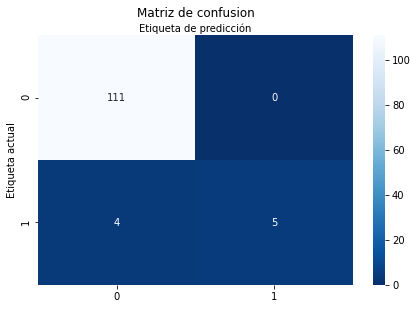

In [184]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import numpy as np

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')


In [185]:
tree_one_accuracy = round(tree_one.score(x_test,y_test), 4)
tree_one_accuracy

0.9667